# CS229 Homework 1 Problem 1

In this exercise we use logistic regression to construct a decision boundary for a binary classification problem. In order to do so, we must first load the data.

In [1]:
import numpy as np
import pandas as pd
import logistic_regression as lr

Here we load the data sets. They are text files, so the numpy ```loadtxt``` function will suffice.

In [2]:
X = np.loadtxt('logistic_x.txt')
y = np.loadtxt('logistic_y.txt')

Next we pack a column of ones into the design matrix ```X``` so when we perform logistic regression to estimate the intercept parameter, we can pack it all into a matrix.

In [3]:
ones = np.ones((99,1))
Xsplit = np.split(X, indices_or_sections=[1], axis=1)
# Pack the intercept coordinates into X so we can calculate the 
# intercept for the logistic regression.
X = np.concatenate([ones, Xsplit[0], Xsplit[1]], axis=1)

Here we pack the data into a DataFrame for plotting.

In [4]:
Xd = pd.DataFrame(X, columns=['x0', 'x1', 'x2'])
yd = pd.DataFrame(y, columns=['y'])
df = pd.concat((yd, Xd), axis=1)

Now we perform regression. The logistic regression function uses the Newton-Raphson method to estimate the parameters for the decision boundary in the data set.

In [5]:
theta, cost = lr.logistic_regression(X, y, epsilon=lr.EPSILON, max_iters=lr.MAX_ITERS)

### Exercise 1.a.
Here are the resulting parameter estimates from logistic regression

In [6]:
print('theta = {}'.format(theta))

theta = [-2.6205116   0.76037154  1.17194674]


with the resulting costs per iteration of Newton-Raphson. The first term is the intercept term for the line, corresponding to the first column in the design matrix ```X``` being all ones.

In [7]:
print('cost = {}'.format(cost))

cost = [ 0.69314718  0.37472471  0.33425014  0.3292812   0.32914756  0.32914743
  0.32914743  0.32914743  0.32914743  0.32914743  0.32914743  0.32914743
  0.32914743  0.32914743  0.32914743  0.32914743  0.32914743  0.32914743
  0.32914743  0.32914743]


So the logistic regression function appears to be converging. The cost functional is minimized on the last iteration.

### Exercise 1.b.
For the final step, we plot the results. We use a color map to distinguish the classification of each datum. The color purple is used for -1, and the color yellow is used for +1.

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr

In [9]:
colors = ['red', 'blue']
levels = [0, 1]
cmap, norm = clr.from_levels_and_colors(levels=levels, colors=colors, extend='max')
cs = np.where(df['y'] < 0, 0, 1)

In [10]:
cs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

Now we plot the results. First, create a polynomial p from the estimated parameters.

In [11]:
p = np.poly1d([-theta[1]/theta[2], -theta[0]/theta[2]])
x = np.linspace(0, 8, 200)

In [12]:
p

poly1d([-0.64881066,  2.23603301])

Then plot the results.

Text(0,0.5,u'x2')

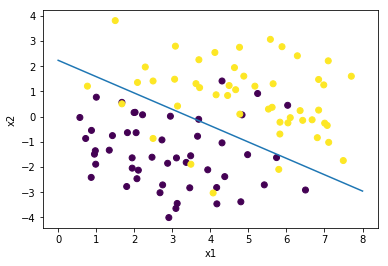

In [13]:
plt.scatter(df['x1'], df['x2'], c=cs)
plt.plot(x, p(x))
plt.xlabel('x1')
plt.ylabel('x2')

In [14]:
plt.show()

This completes the exercise.